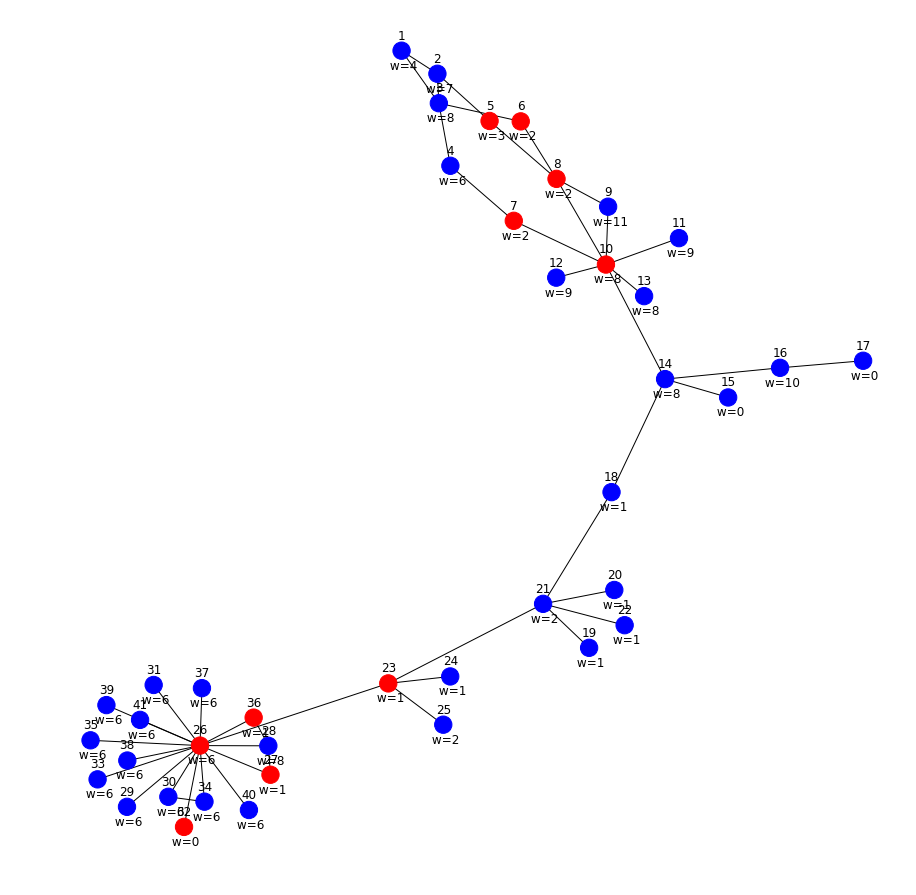

In [2]:
import sys
import matplotlib.pyplot as plt
import networkx as nx

#######################
#graph - adjacency
G = nx.Graph()
weights = [0, 2,2,2,3,2,2,2,1,8,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0];
alpha = 1; 
weights_additional = [4, 5, 6, 4, 0, 0, 0, 0, 10, 0, 8, 8, 8, 8, 0, 10, 0, 1, 1, 1, 1, 
                     1, 0, 1, 1, 0, 0, 8, 6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6]

weights_additional = [x*alpha for x in weights_additional]
weights = [weights[x] + weights_additional[x] for x in range(41)]

for i in range(1,42):
    G.add_node(i, weight=weights[i-1])
    weights[2]
edge_links = [(1,2), (1,3), (2,3), (3, 4), (2, 5), (3, 6), (4, 7), (5, 8), (6, 8), (7, 10), (8,9), (8,10), (9, 10),
             (10, 11), (10, 12), (10, 13), (10, 14), (14, 15), (14, 16), (14, 18), (16, 17), (18, 21), (19, 21),
              (20, 21), (21, 22), (21,23), (23, 24), (23, 25), (23, 26),(26, 27), (26, 28), (26, 29), (26, 30,),
               (26, 31), (26, 32), (26, 33), (26, 34), (26, 35), (26, 36), (26, 37), (26, 38), (26, 39), (26, 40),
              (26, 41), (27, 28), (28, 36), (30, 34)]
G.add_edges_from(edge_links)
#######################
# node-color
color_map = ['blue'] * 41
indices = [4,5,6,7,9,22,25,26,31,35] #madams
for ind in indices:
    color_map[ind] = 'red'
#######################
#labels
labels = {
    n: str(n) + '\n\n w=' + str(G.nodes[n]['weight']) if 'weight' in G.nodes[n] else str(n)
    for n in G.nodes}
#done

plt.figure(3,figsize=(12,12))
nx.draw(G,node_color = color_map, with_labels=True,labels=labels)
plt.savefig('plot.png')
plt.show() 

In [3]:
#Calculate the Shapley value and v(.) value togehter, Herbet's heuristic
#create main permutations
import numpy as np
import math
n = 41; t = 250; r = n*t;
allArray = np.zeros((r,n), dtype=int)
for i in range(0,r): #go from 0 to r-1, since index of array starts from 0, be careful
    allArray[i] = np.random.permutation(range(1,n+1)) #permutation stays from 1 to 41
allArray[:2] #how it looks like

array([[35, 17,  6, 25, 12,  8, 11, 19, 40, 20, 31, 37, 26, 34,  9,  1,
        14, 41, 36, 16, 22,  5, 39, 28, 23, 32,  7, 27, 30, 21, 18,  2,
         4, 15, 13,  3, 10, 38, 33, 29, 24],
       [ 9,  3, 22, 27,  5, 30, 38,  6, 24, 21, 13, 28, 12, 18, 37, 34,
        16, 31, 20, 41, 15, 35,  2, 25, 10, 19, 39, 33,  4, 14, 36, 40,
         1,  8, 26, 29, 17, 32, 23,  7, 11]])

In [4]:
def approxim(dummy, group, weights,graph): #function which calculates v(S) - V(S/lastindex)
    player=  dummy[group]
    if group == 0:
        return 0
    else:
        with_S = 0
        sub_dummy = dummy[0:group+1]
        for i in sub_dummy:
            adjacent = list(graph.neighbors(i))
            summ = 0
            for j in adjacent:
                if j in sub_dummy:
                    summ = summ + 1
            if summ == graph.degree[i]:
                with_S = with_S + weights[i - 1]
        if group ==1:
            without_S = 0
        else:
            without_S = 0
            sub_dummy = dummy[0:group]
            for i in sub_dummy:
                adjacent = list(graph.neighbors(i))
                summ = 0
                for j in adjacent:
                    if j in sub_dummy:
                        summ = summ + 1
                if summ == graph.degree[i]:
                    without_S = without_S + weights[i - 1]
        return (with_S - without_S)

In [31]:
#iterate for players
import math
import time
start_time = time.time()
n = 41; t = 250; r = n*t;
marginal = np.zeros((n,r), dtype = int)  #keep all the marginal values
for i in range(1,n+1): #for all players
    for z in range(0,r): #for all random permutations
        j = math.floor(z/t) #group number in the current iteration
        dummy = allArray[z] #take the corresponding row of all permutations
        index_player_i = np.where(dummy == i)[0][0] #index of our current player
        temp = dummy[j] #store the location which will be changed
        dummy[index_player_i] = temp
        dummy[j] = i
        marginal[i-1,z] = approxim(dummy, j, weights, G)
ar = np.mean(marginal, axis=1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
ar1 = np.sort(ar) #sort
ar2 = np.argsort(ar) + 1 #index sorted, plus one makes index 0 -> 1, 1 -> 2, ...
elapsed_time = time.time() - start_time
print(elapsed_time)

135.67808294296265


In [32]:
ar2 #sorted nodes

array([32, 24, 22, 20, 19, 25, 15, 18, 21, 23,  6, 27, 36, 28,  5, 17, 31,
       35, 37, 38, 39, 33, 29, 41, 40,  7,  4, 30, 34,  1, 16,  9, 13, 12,
       11,  2, 14,  8,  3, 10, 26], dtype=int64)

In [33]:
ar1 #Shapley values

array([0.347, 0.698, 0.830, 0.832, 0.832, 1.196, 1.581, 2.252, 2.358,
       2.363, 2.676, 2.691, 2.737, 3.026, 3.113, 3.344, 3.395, 3.395,
       3.395, 3.395, 3.395, 3.395, 3.395, 3.395, 3.395, 3.688, 4.251,
       4.378, 4.406, 4.681, 4.926, 4.996, 5.035, 5.539, 5.539, 5.702,
       6.304, 6.647, 7.353, 20.337, 34.209])

In [34]:
ar #unsorted

array([4.681, 5.702, 7.353, 4.251, 3.113, 2.676, 3.688, 6.647, 4.996,
       20.337, 5.539, 5.539, 5.035, 6.304, 1.581, 4.926, 3.344, 2.252,
       0.832, 0.832, 2.358, 0.830, 2.363, 0.698, 1.196, 34.209, 2.691,
       3.026, 3.395, 4.378, 3.395, 0.347, 3.395, 4.406, 3.395, 2.737,
       3.395, 3.395, 3.395, 3.395, 3.395])